<a href="https://colab.research.google.com/github/robert-harr/Getting-started-with-CMSSW/blob/master/PlanetaryOrbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

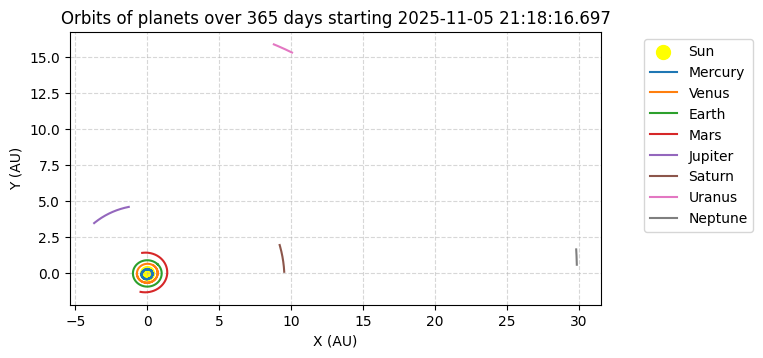

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.coordinates import solar_system_ephemeris, get_body_barycentric
import astropy.units as u

def plot_planet_orbits(planets, start_time, days=365, n_steps=500):
    """
    plots the orbits of given planets in the ecliptic plane over a given time span.

    planets : list of planet names (strings compatible with Astropy, e.g. 'mercury', 'venus', etc.)
    start_time : astropy.time.Time instance for the start date
    days : number of days from start_time to simulate
    n_steps : number of time samples
    """
    # Use built-in ephemeris or JPL if you like
    solar_system_ephemeris.set('builtin')  # or 'jpl' if you have jplephem installed :contentReference[oaicite:2]{index=2}

    times = start_time + np.linspace(0, days, n_steps)*u.day
    fig, ax = plt.subplots(figsize=(8,8))
    ax.set_aspect('equal', 'box')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xlabel('X (AU)')
    ax.set_ylabel('Y (AU)')
    ax.set_title(f'Orbits of planets over {days} days starting {start_time.iso}')

    # Plot the Sun at the origin
    ax.scatter(0,0, color='yellow', s=100, label='Sun')

    for planet in planets:
        xs = []
        ys = []
        for t in times:
            pos = get_body_barycentric(planet, t)  # returns barycentric position in ICRS
            # Convert to AU & take x, y components (assuming ecliptic ~ equatorial XY plane)
            x = pos.x.to(u.AU).value
            y = pos.y.to(u.AU).value
            xs.append(x)
            ys.append(y)
        ax.plot(xs, ys, label=planet.capitalize())

    ax.legend(loc='upper right', bbox_to_anchor=(1.3,1))
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    planets = ['mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune']
    start_time = Time.now()
    plot_planet_orbits(planets, start_time, days=365, n_steps=1000)
